## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
# The below line suppresses any FutureWarnings i.e. warnings about changes being made in any future versions of the imported methods and attributes
warnings.simplefilter(action='ignore', category=FutureWarning)

## Style Sheet
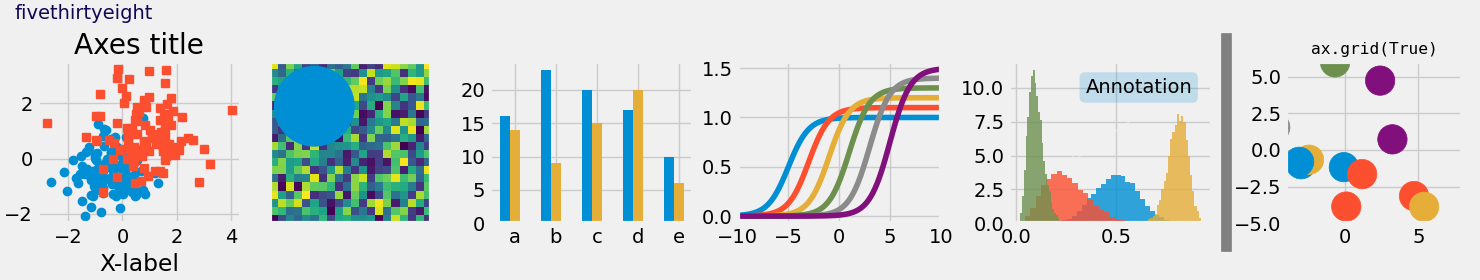

In [2]:
plt.style.use('fivethirtyeight')

## Reading the CSV File into a pandas DataFrame

In [3]:
df = pd.read_csv('campus.csv') 
df.drop('Timestamp', axis='columns', inplace=True)
print(df.shape)
df.head()

(227, 15)


,What is your current year of study,What is your current relationship status?,How do you prefer studying before exams?,Do you do competitive programming?,Which hostel do you live in?,What is your gender?,What is your favourite sport?,Favourite hangout place in campus,Which state/union territory do you belong to?,What is your dept?,What is your preferred coding language?,What is your favourite place to eat at IIT Guwahati?,Which is your favourite club in IIT Guwahati?,Are you satisfied in IIT Guwahati,What is your current cpi?
0,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


## Making DataFrame easier to work with and Cleaning data
There are some columns where inputs were taken as a short text answer format, obviously these columns have a lot of useless or incompatible entries

CPI column used short text answer format

#### Renaming Columns

In [4]:
# Renaming columns with shorter names
df.rename(columns = {'What is your current year of study':'Year', 
                     'What is your current relationship status?': 'Relationship',
                     'How do you prefer studying before exams?': 'Study',
                     'Do you do competitive programming?': 'CP',
                     'Which hostel do you live in?': 'Hostel',
                     'What is your gender?': 'Gender',
                     'What is your favourite sport?': 'Sport',
                     'Favourite hangout place in campus': 'Hangout_Spot',
                     'Which state/union territory do you belong to?': 'State',
                     'What is your dept?': 'Dept',
                     'What is your preferred coding language?': 'Coding_Lang',
                     'What is your favourite place to eat at IIT Guwahati?': 'Fav_Place_to_Eat',
                     'Which is your favourite club in IIT Guwahati?': 'Fav_Club',
                     'Are you satisfied in IIT Guwahati': 'Satisfied',
                     'What is your current cpi?': 'CPI'}, inplace = True)

df.head()

,Year,Relationship,Study,CP,Hostel,Gender,Sport,Hangout_Spot,State,Dept,Coding_Lang,Fav_Place_to_Eat,Fav_Club,Satisfied,CPI
0,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


#### Simplifying/shortening some entries in data

In [5]:
# Renaming some entries in relationship column
print('Unique values in relationship column:')
print(df['Relationship'].unique())
print()

df['Relationship'].replace('In a relationship', 'Relationship', inplace=True)
df['Relationship'].replace("It's complicated", 'Complicated', inplace=True)

print('Unique values in relationship column after replacements:')
print(df['Relationship'].unique())

Unique values in relationship column:
['In a relationship' 'Single' "It's complicated" nan]

Unique values in relationship column after replacements:
['Relationship' 'Single' 'Complicated' nan]


In [6]:
# Renaming some entries in study column
print('Unique values in study column:')
print(df['Study'].unique())
print()

df['Study'].replace('Pulling of all nighters :)', 'All_Nighters', inplace=True)
df['Study'].replace('Studying on a regular basis', 'Regular_Study', inplace=True)

print('Unique values in study column after replacements:')
print(df['Study'].unique())

Unique values in study column:
['Pulling of all nighters :)' 'Studying on a regular basis']

Unique values in study column after replacements:
['All_Nighters' 'Regular_Study']


In [7]:
# Renaming some entries in hangout spot column
print('Unique values in hangout spot column:')
print(df['Hangout_Spot'].unique())
print()

df['Hangout_Spot'].replace('IIT G lake (in front of library)', 'IITG_Lake', inplace=True)
df['Hangout_Spot'].replace('Serpentine Lake 😏', 'Serpentine;)', inplace=True)
df['Hangout_Spot'].replace('Lake in front of the hospital', 'Tihor_Lake', inplace=True)
df['Hangout_Spot'] = df['Hangout_Spot'].str.replace(' ', '_')

print('Unique values in hangout spot column after replacements:')
print(df['Hangout_Spot'].unique())

Unique values in hangout spot column:
['IIT G lake (in front of library)' 'Food Court' 'Hostel Canteen' 'Khoka'
 'Serpentine Lake 😏' nan 'New Sac' 'Old Sac' 'Playgrounds'
 'Lake in front of the hospital' 'Market Complex' 'Others']

Unique values in hangout spot column after replacements:
['IITG_Lake' 'Food_Court' 'Hostel_Canteen' 'Khoka' 'Serpentine;)' nan
 'New_Sac' 'Old_Sac' 'Playgrounds' 'Tihor_Lake' 'Market_Complex' 'Others']


In [8]:
# Some other weird things shortened
df['State'].replace('The Government of NCT of Delhi', 'Delhi', inplace=True)
df['Fav_Place_to_Eat'].replace('None', np.nan, inplace=True)
df['Fav_Club'].replace('ml.ai', 'iitg.ai', inplace=True)
df['Hostel'].replace('Bhramaputra', 'Brahmaputra', inplace=True)

#### Type Casting the 'CPI' Column from String to Float

In [9]:
# All non-numeric answers of cpi converted to float
def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False
    
for i in df.index:
    if isfloat(df.loc[i, 'CPI']):
        df.loc[i, 'CPI'] = float(df.loc[i, 'CPI'])
    else:
        df.loc[i, 'CPI'] = np.nan
        
    # Values of cpi outside range 4-10 is considered fake
    if (df.loc[i, 'CPI'] >= 10) | (df.loc[i, 'CPI'] <= 4):
        df.loc[i, 'CPI'] = np.nan

In [10]:
df['CPI'] = df['CPI'].astype('float64')
df['CPI'].isna().sum()

21

#### Cleaning Redundant Value in the 'Fav_Sport' Column

In [11]:
df['Sport'] = df['Sport'].str.replace(' ', '')

# Removing all the irrelevant answers and replacing them by NaN
df.replace(to_replace=['Sex', 'GYMMING', 'none', 'Nothing', 'WWE', 'Bro?', 'Barricaderiding', 'PeopleGazing', 'Coding', 'Nosportlol', 'Na',
                       'Playingwithmymentalhealth', 'GenshinImpact'], value=np.nan, inplace=True)

# Cleaning the 'Table Tennis' entries 
df['Sport'] = df['Sport'].str.replace('Tabletennis', 'TT').str.replace('TableTennis', 'TT').str.replace('tabletennis', 'TT').str.replace('tt', 'TT')

# Cleaning the 'Football' entries 
df['Sport'] = df['Sport'].str.replace('futbol', 'Football')

# Cleaning the 'Cricket' entries
df['Sport'] = df['Sport'].str.replace('CRICKET', 'Cricket').str.replace('Cricket,badminton', 'Cricket').str.replace('Cricket,Football,Swimming,Tennis.', 'Cricket').str.replace('cricket', 'Cricket').str.replace('Cricket,volleyball', 'Cricket').str.replace('Bat-Ball', 'Cricket')

# Cleaning the 'Badminton' entries
df['Sport'] = df['Sport'].str.replace('badminton', 'Badminton').str.replace('Badmintonlol', 'Badminton')

# Cleaning the 'Basketball' entries
df['Sport'] = df['Sport'].str.replace('basketball', 'Basketball')

# Cleaning the 'Athletics' entries
df['Sport'] = df['Sport'].str.replace('Athletic', 'Athletics').str.replace('Running', 'Athletics').str.replace('Athleticss', 'Athletics')

# Cleaning the 'Chess' entries
df['Sport'] = df['Sport'].str.replace('chess', 'Chess').str.replace('Chesss', 'Chess').str.replace('Chessss', 'Chess')

# Cleaning the 'Swimming' entries
df['Sport'] = df['Sport'].str.replace('swimming', 'Swimming').str.replace('SwimmingandBadminton', 'Swimming')

# Cleaning the 'Volleyball' entries
df['Sport'] = df['Sport'].str.replace('towatchisCricketandBasketball,toplayisvolleyball', 'Volleyball')

# Cleaning the 'Hockey' entries
df['Sport'] = df['Sport'].str.replace('hockey', 'Hockey')

# Cleaning the 'Tennis' entries
df['Sport'] = df['Sport'].str.replace('LT', 'Tennis')

print(df['Sport'].unique())

['TT' 'Football' 'Badminton' 'Cricket' 'Basketball' 'Chess' 'Athletics'
 nan 'Swimming' 'Volleyball' 'Tennis' 'Hockey' 'Archery' 'Dodgeball'
 'Handball' 'FigureSkating' 'Kabaddi' 'Bikeriding' 'Gymnastics' 'Squash'
 'Droneracing']


## Exploratory Data Analysis (EDA)

### 1. What is the variation in CPI for different departments? 
#### (I have taken only the 5 largest departments (in terms of the number of responses) for relevant results)

In [12]:
# List of the top 5 largest departments (as per the number of responses)
print('Count of students in each department: ')
df['Dept'].value_counts()[:5]

Count of students in each department: 


Dept
CSE    58
ECE    34
ME     26
EEE    22
CST    18
Name: count, dtype: int64

In [13]:
# Mean CPI for severall branches and overall mean CPI

mean_CSE = df[df['Dept'] == 'CSE']['CPI'].mean()
mean_ECE = df[df['Dept'] == 'ECE']['CPI'].mean()
mean_ME = df[df['Dept'] == 'ME']['CPI'].mean()
mean_EEE = df[df['Dept'] == 'EEE']['CPI'].mean()
mean_CST = df[df['Dept'] == 'CST']['CPI'].mean()
overall_mean = df['CPI'].mean()

print("The average CPI for CSE is: ", mean_CSE)
print("The average CPI for ECE is: ", mean_ECE)
print("The average CPI for ME is: ", mean_ME)
print("The average CPI for EEE is: ", mean_EEE)
print("The average CPI for CST is: ", mean_CST)
print("The overall average CPI is: ", overall_mean)

The average CPI for CSE is:  8.557156862745098
The average CPI for ECE is:  8.416969696969696
The average CPI for ME is:  7.820869565217391
The average CPI for EEE is:  7.774285714285715
The average CPI for CST is:  7.423125
The overall average CPI is:  8.129587378640776


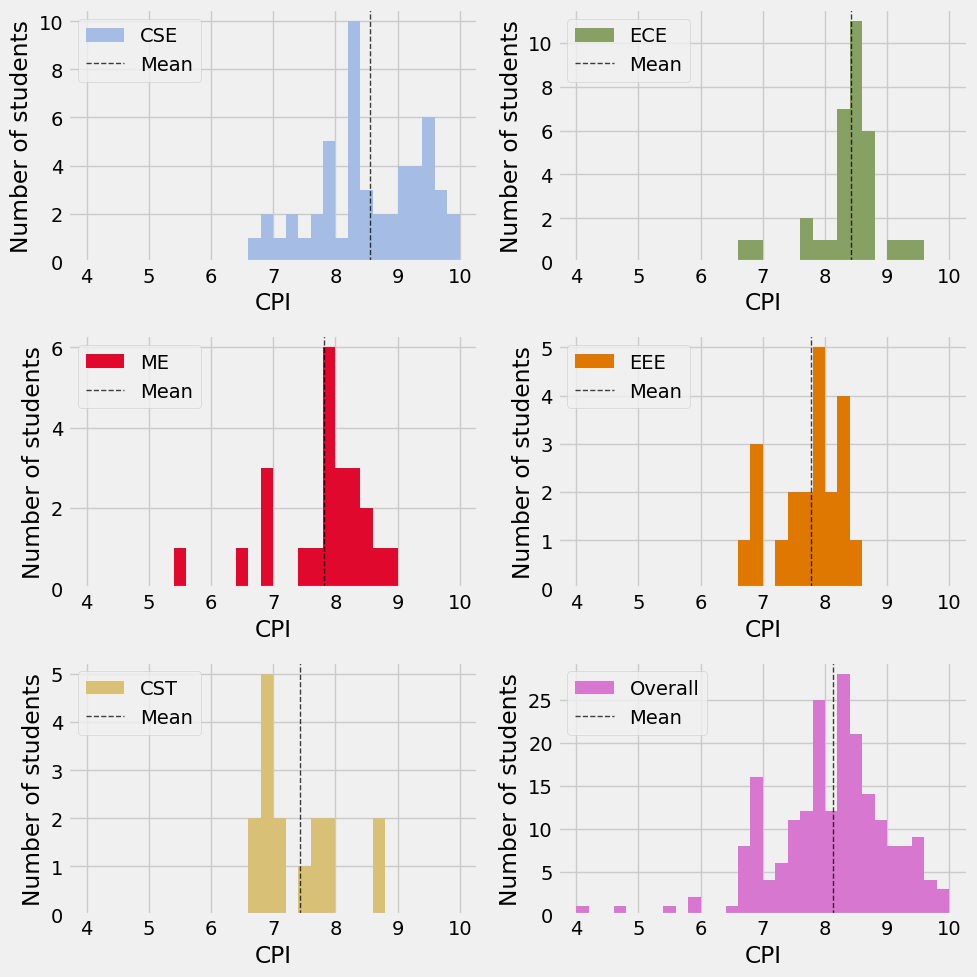

In [14]:
# Create a histogram of the data 
fig, ax = plt.subplots(3, 2, figsize=(10,10))

# Histogram for CSE
ax[0,0].hist(df[df['Dept'] == 'CSE']['CPI'], color='#a5bde5', bins=np.arange(4,10.2,0.2), label='CSE') 
ax[0,0].axvline(mean_CSE, color='k', linestyle='dashed', linewidth=1, alpha=0.75, label='Mean')
ax[0,0].set_xlabel('CPI')
ax[0,0].set_ylabel('Number of students')
ax[0,0].legend(loc='upper left')

# Histogram for ECE
ax[0,1].hist(df[df['Dept'] == 'ECE']['CPI'], color='#87a063', bins=np.arange(4,10.2,0.2), label='ECE') 
ax[0,1].axvline(mean_ECE, color='k', linestyle='dashed', linewidth=1, alpha=0.75, label='Mean')
ax[0,1].set_xlabel('CPI')
ax[0,1].set_ylabel('Number of students')
ax[0,1].legend(loc='upper left')

# Histogram for ME
ax[1,0].hist(df[df['Dept'] == 'ME']['CPI'], color='#e0082d', bins=np.arange(4,10.2,0.2), label='ME') 
ax[1,0].axvline(mean_ME, color='k', linestyle='dashed', linewidth=1, alpha=0.75, label='Mean')
ax[1,0].set_xlabel('CPI')
ax[1,0].set_ylabel('Number of students')
ax[1,0].legend(loc='upper left')

# Histogram for EEE
ax[1,1].hist(df[df['Dept'] == 'EEE']['CPI'], color='#df7800', bins=np.arange(4,10.2,0.2), label='EEE') 
ax[1,1].axvline(mean_EEE, color='k', linestyle='dashed', linewidth=1, alpha=0.75, label='Mean')
ax[1,1].set_xlabel('CPI')
ax[1,1].set_ylabel('Number of students')
ax[1,1].legend(loc='upper left')

# Histogram for CST
ax[2,0].hist(df[df['Dept'] == 'CST']['CPI'], color='#d8c077', bins=np.arange(4,10.2,0.2), label='CST') 
ax[2,0].axvline(mean_CST, color='k', linestyle='dashed', linewidth=1, alpha=0.75, label='Mean')
ax[2,0].set_xlabel('CPI')
ax[2,0].set_ylabel('Number of students')
ax[2,0].legend(loc='upper left')

# Histogram for Overall
ax[2,1].hist(df['CPI'], color='#d877cf', bins=np.arange(4,10.2,0.2), label='Overall') 
ax[2,1].axvline(overall_mean, color='k', linestyle='dashed', linewidth=1, alpha=0.75, label='Mean')
ax[2,1].set_xlabel('CPI')
ax[2,1].set_ylabel('Number of students')
ax[2,1].legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Analysis
1. We can clearly see the average CPI for CSE and ECE is around 8.5, which is significantly greater than the average CPI for other departments.
2. Also, it can be observed that the plot for the CSE department has two spikes, one at 8.3 and the other at 9.5 indicating that there is a group of extremely high scorers in the CSE department scoring consistently in the mid 9s.
3. Another thing to notice is the existence of some outliers scoring below 6 in the plot for overall CPI, but these are absent in any other plots indicating these students belong to the departments not plotted here

#### Inference
1. The high average of the CSE and ECE departments brings the overall CPI to around 8.1 which would otherwise be anchored down by other departments
2. Under 6 scorers are absent in any of the 5 departments plotted above (except 1 person in ME)

### 2. How interested are different year students in competitive programming?

In [15]:
# Number of students in different years of study
year2_count = df[df['Year'] == '2nd'].shape[0]
year3_count = df[df['Year'] == '3rd'].shape[0]
year4_count = df[df['Year'] == '4th'].shape[0]
print('Number of 2nd year students: ', year2_count)
print('Number of 3rd year students: ', year3_count)
print('Number of 4th year students: ', year4_count)

print('')

# Number of students interested in CP divided as per there year of study
cp_yes_2yr = df[(df['Year'] == '2nd') & (df['CP'] == 'Yes')].shape[0]
cp_yes_3yr = df[(df['Year'] == '3rd') & (df['CP'] == 'Yes')].shape[0]
cp_yes_4yr = df[(df['Year'] == '4th') & (df['CP'] == 'Yes')].shape[0]
print('Percentage of 2nd year students interested in CP:', cp_yes_2yr/year2_count*100)
print('Percentage of 3rd year students interested in CP:', cp_yes_3yr/year3_count*100)
print('Percentage of 4th year students interested in CP:', cp_yes_4yr/year4_count*100)

print('')

# Number of students not interested in CP divided as per there year of study
cp_no_2yr = df[(df['Year'] == '2nd') & (df['CP'] == 'No')].shape[0]
cp_no_3yr = df[(df['Year'] == '3rd') & (df['CP'] == 'No')].shape[0]
cp_no_4yr = df[(df['Year'] == '4th') & (df['CP'] == 'No')].shape[0]
print('Percentage of 2nd year students not interested in CP:', cp_no_2yr/year2_count*100)
print('Percentage of 3rd year students not interested in CP:', cp_no_3yr/year3_count*100)
print('Percentage of 4th year students not interested in CP:', cp_no_4yr/year4_count*100)

Number of 2nd year students:  162
Number of 3rd year students:  32
Number of 4th year students:  21

Percentage of 2nd year students interested in CP: 62.34567901234568
Percentage of 3rd year students interested in CP: 46.875
Percentage of 4th year students interested in CP: 52.38095238095239

Percentage of 2nd year students not interested in CP: 37.65432098765432
Percentage of 3rd year students not interested in CP: 53.125
Percentage of 4th year students not interested in CP: 47.61904761904761


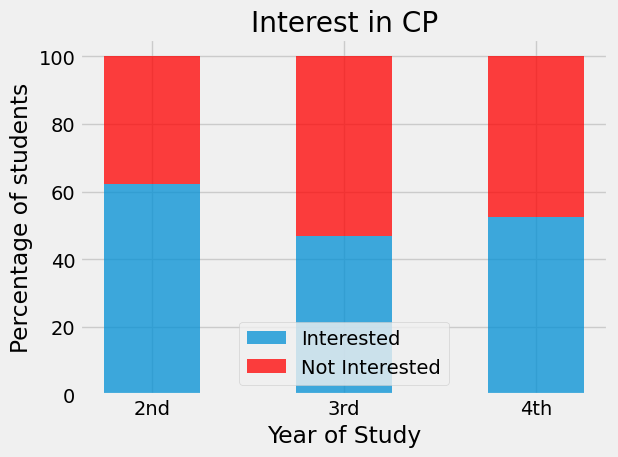

In [16]:
y1 = [cp_yes_2yr/year2_count*100, cp_yes_3yr/year3_count*100, cp_yes_4yr/year4_count*100]
y2 = [cp_no_2yr/year2_count*100 , cp_no_3yr/year3_count*100, cp_no_4yr/year4_count*100]

plt.bar(['2nd', '3rd', '4th'], y1, width=0.5, label='Interested', alpha=0.75)
plt.bar(['2nd', '3rd', '4th'], y2, bottom=y1, color='red', width=0.5, label='Not Interested', alpha=0.75)
plt.xlabel('Year of Study')
plt.ylabel('Percentage of students')
plt.title('Interest in CP')

plt.legend()
plt.tight_layout()
plt.show()

#### Analysis
1. 2nd year students seem to be the most intereested in competitive programming, followed by 4th yearites and finally 3rd yearites
2. There is a dip in the interest for the 3rd yearites, with a substantial increase of interest for the 4th yearites

#### Inference
1. The percentage of students interested in CP seems to always be near 50% with no signs of decrease even with the advent of AI

### 3. What are the students' favorite clubs based on their year of study?
#### (Of course the answer is Coding Club (;, but what are the next favorites)

In [17]:
# Number of students in different years of study
year2_count = df[df['Year'] == '2nd'].shape[0]
year3_count = df[df['Year'] == '3rd'].shape[0]
year4_count = df[df['Year'] == '4th'].shape[0]

print('Number of 2nd year students: ', year2_count)
print('Number of 3rd year students: ', year3_count)
print('Number of 4th year students: ', year4_count)

Number of 2nd year students:  162
Number of 3rd year students:  32
Number of 4th year students:  21


Favorite clubs for 2nd yearites: 
Fav_Club
Coding Club                 58
iitg.ai                     13
E cell                      12
Finance and Economics        9
Consulting and Analytics     9
Name: count, dtype: int64


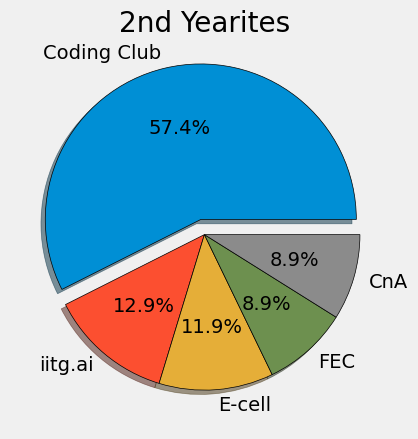

Favorite clubs for 3rd yearites: 
Fav_Club
Coding Club    14
E cell          4
iitg.ai         2
Prakriti        2
Alcher          1
Name: count, dtype: int64


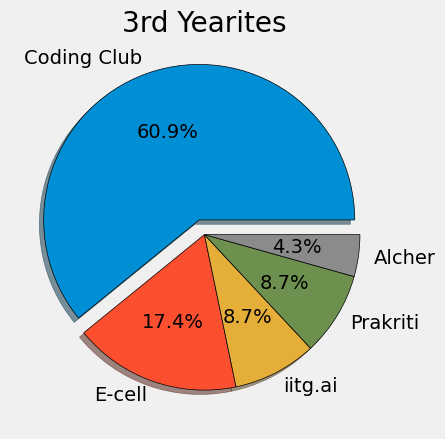

Favorite clubs for 4th yearites: 
Fav_Club
Coding Club      8
Palates          2
Cadence          2
Aeromodelling    2
Alcher           1
Name: count, dtype: int64


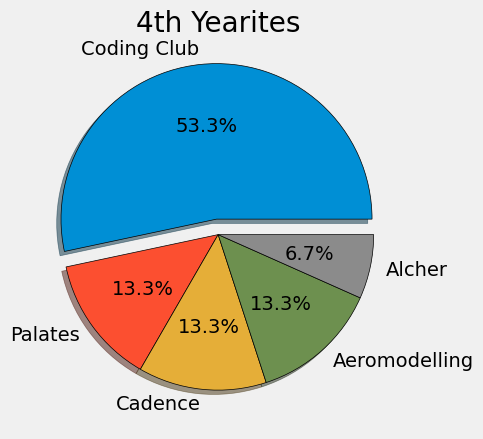

In [18]:
# For 2nd yearites
labels = ['Coding Club', 'iitg.ai', 'E-cell', 'FEC', 'CnA']
explode = [0.1,0,0,0,0]
print('Favorite clubs for 2nd yearites: ')
print(df[df['Year'] == '2nd']['Fav_Club'].value_counts()[:5])
plt.pie(df[df['Year'] == '2nd']['Fav_Club'].value_counts()[:5], labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, shadow=True, explode=explode)
plt.title('2nd Yearites')
plt.show()

# For 3rd yearites
labels = ['Coding Club', 'E-cell', 'iitg.ai', 'Prakriti', 'Alcher']
explode = [0.1,0,0,0,0]
print('Favorite clubs for 3rd yearites: ')
print(df[df['Year'] == '3rd']['Fav_Club'].value_counts()[:5])
plt.pie(df[df['Year'] == '3rd']['Fav_Club'].value_counts()[:5], labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, shadow=True, explode=explode)
plt.title('3rd Yearites')
plt.show()

labels = ['Coding Club', 'Palates', 'Cadence', 'Aeromodelling', 'Alcher']
explode = [0.1,0,0,0,0]
print('Favorite clubs for 4th yearites: ')
print(df[df['Year'] == '4th']['Fav_Club'].value_counts()[:5])
plt.pie(df[df['Year'] == '4th']['Fav_Club'].value_counts()[:5], labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, shadow=True, explode=explode)
plt.title('4th Yearites')
plt.show()

#### Analysis
1. The coding club is the without a doubt, the most popular club in IITG irrespective of the year of study
2. The 2nd yearites are interested in more technical clubs such as iitg.ai, E-cell, FEC and CnA
3. The 3rd yearites, and more so the 4th yearites, surprisingly show an increasing interest in non-technical clubs such as Palates, Cadence and Alcher (though not really a club)

#### Inference
1. The coding club being on top reflects its striking popularity amongst the students of all years
2. The surprising increase in interest in non-technical clubs for the 4th yearites may be attributed to the low number of responses filled by the 4th year students leading to a bias

### 4. What are the reasons for students to be dissatisfied with IITG?

#### Are academics the reason for student dissatisfaction?

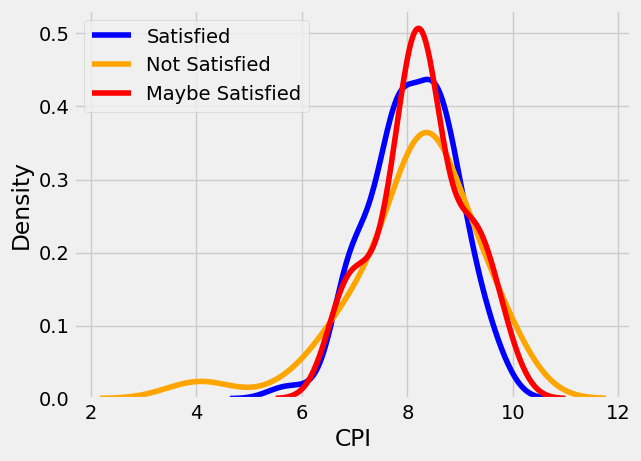

In [19]:
# Kernel Density Estimations for different satisfaction levels wrt CPI 
sns.kdeplot(df[df['Satisfied'] == 'Yes']['CPI'], color='blue', label='Satisfied')
sns.kdeplot(df[df['Satisfied'] == 'No']['CPI'], color='orange', label='Not Satisfied')
sns.kdeplot(df[df['Satisfied'] == 'Maybe']['CPI'], color='red', label='Maybe Satisfied')
plt.legend()
plt.show()

#### How satisfied are single students and students in a relationship with IITG

Single Students: 
Satisfied
Yes      92
Maybe    46
No       18
Name: count, dtype: int64


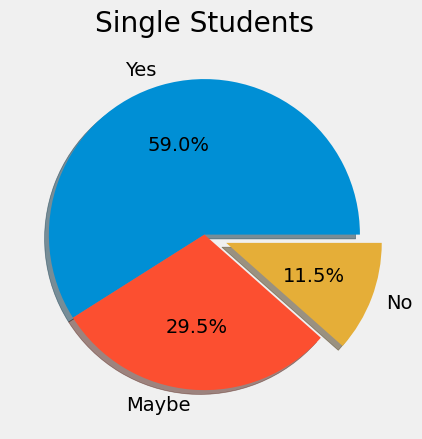

Students in a relationship: 
Satisfied
Yes      22
Maybe    12
No        7
Name: count, dtype: int64


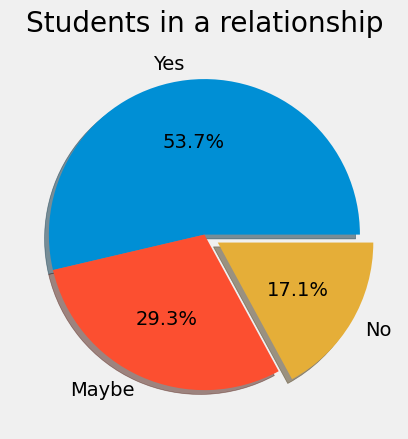

Students in a complicated situation: 
Satisfied
Yes      10
Maybe    10
No        6
Name: count, dtype: int64


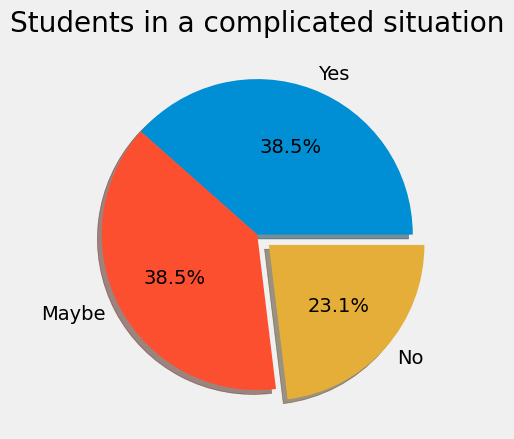

In [20]:
# For single students 
labels = ['Yes', 'Maybe', 'No']
explode=[0,0,0.15]
print('Single Students: ')
print(df[df['Relationship'] == 'Single']['Satisfied'].value_counts())
plt.pie(df[df['Relationship'] == 'Single']['Satisfied'].value_counts(), labels=labels, shadow=True, autopct='%1.1f%%', explode=explode)
plt.title('Single Students')
plt.show()

# For students in a relationship
labels = ['Yes', 'Maybe', 'No']
explode=[0,0,0.1]
print('Students in a relationship: ')
print(df[df['Relationship'] == 'Relationship']['Satisfied'].value_counts())
plt.pie(df[df['Relationship'] == 'Relationship']['Satisfied'].value_counts(), labels=labels, shadow=True, autopct='%1.1f%%', explode=explode)
plt.title('Students in a relationship')
plt.show()

# For students in a complicated situation
labels = ['Yes', 'Maybe', 'No']
explode=[0,0,0.1]
print('Students in a complicated situation: ')
print(df[df['Relationship'] == 'Complicated']['Satisfied'].value_counts())
plt.pie(df[df['Relationship'] == 'Complicated']['Satisfied'].value_counts(), labels=labels, shadow=True, autopct='%1.1f%%', explode=explode)
plt.title('Students in a complicated situation')
plt.show()

#### Analysis
1. The average CPI for all the three satisfaction groups appears to be almost the same
2. The single students are the most satisfied with IITG, followed closely by students in a relationship, with the least satisfied group being students in a complicated situation
3. The number of students openly being dissatisfied with IITG are the most abundant in the 'Complicated Situation' group, with a tie between satisfied and maybe satisfied

#### Inference
1. Academics (CPI) does not seem to be the major factor for dissatisfaction of students in IITG, but their relationship status is
2. Contrary to popular belief, single students are more satisfied with their college than people in a relationship
3. The students in a complicated situation seem to be the most unhappy, with 38.5% opting for the 'Maybe' option tieing with the 'Yes' option voters and over 23% opting for the 'No' option

### 5. Do people from a particular state prefer a particular sport?

In [21]:
# 5 largest states with the most submissions
print(df['State'].value_counts()[:5])

State
Maharashtra       30
Uttar Pradesh     30
Bihar             21
Madhya Pradesh    15
Rajasthan         15
Name: count, dtype: int64


For Maharashtra: 
Sport
Swimming     5
Badminton    4
TT           4
Tennis       3
Cricket      3
Name: count, dtype: int64


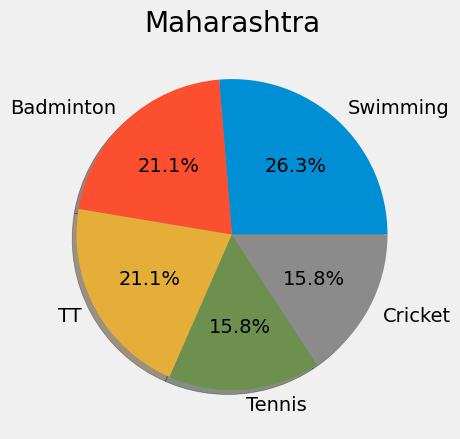

For Uttar Pradesh
Sport
Cricket      11
Badminton     7
Athletics     3
Football      1
Swimming      1
Name: count, dtype: int64


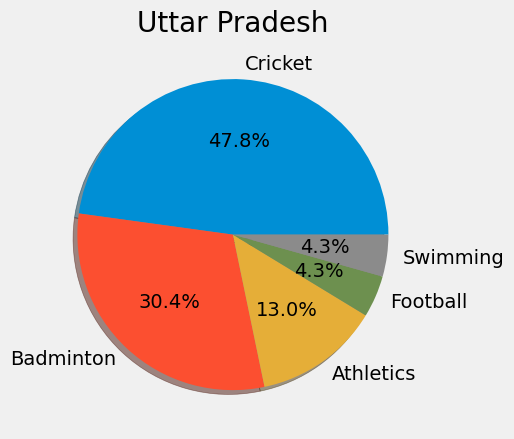

For Bihar
Sport
Badminton    4
TT           2
Chess        2
Cricket      2
Football     1
Name: count, dtype: int64


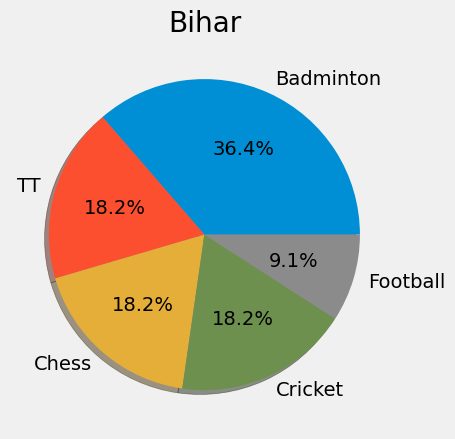

For Rajasthan
Sport
Badminton     5
Cricket       2
Basketball    1
TT            1
Name: count, dtype: int64


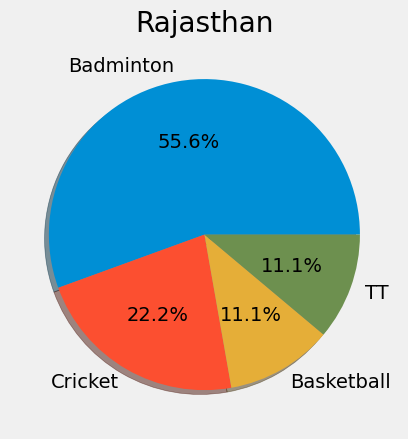

For Madhya Pradesh
Sport
Cricket       6
Football      2
Basketball    2
Swimming      2
Chess         1
Name: count, dtype: int64


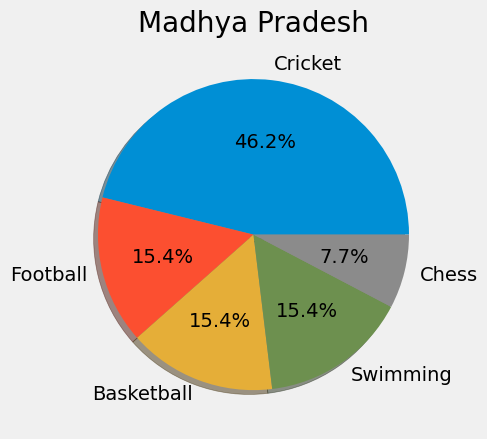

In [22]:
# For Maharashtra
print('For Maharashtra: ')
print(df[df['State'] == 'Maharashtra']['Sport'].value_counts()[0:5])
labels = ['Swimming', 'Badminton', 'TT', 'Tennis', 'Cricket']
plt.pie(df[df['State'] == 'Maharashtra']['Sport'].value_counts()[0:5], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Maharashtra')
plt.show()

# For Uttar Pradesh
print('For Uttar Pradesh')
print(df[df['State'] == 'Uttar Pradesh']['Sport'].value_counts()[0:5])
labels = ['Cricket', 'Badminton', 'Athletics', 'Football', 'Swimming']
plt.pie(df[df['State'] == 'Uttar Pradesh']['Sport'].value_counts()[0:5], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Uttar Pradesh')
plt.show()

# For Bihar
print('For Bihar')
print(df[df['State'] == 'Bihar']['Sport'].value_counts()[0:5])
labels = ['Badminton', 'TT', 'Chess', 'Cricket', 'Football']
plt.pie(df[df['State'] == 'Bihar']['Sport'].value_counts()[0:5], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Bihar')
plt.show()

# For Rajasthan
print('For Rajasthan')
print(df[df['State'] == 'Rajasthan']['Sport'].value_counts()[0:5])
labels = ['Badminton', 'Cricket', 'Basketball', 'TT']
plt.pie(df[df['State'] == 'Rajasthan']['Sport'].value_counts()[0:5], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Rajasthan')
plt.show()

# For Madhya Pradesh
print('For Madhya Pradesh')
print(df[df['State'] == 'Madhya Pradesh']['Sport'].value_counts()[0:5])
labels = ['Cricket', 'Football', 'Basketball', 'Swimming', 'Chess']
plt.pie(df[df['State'] == 'Madhya Pradesh']['Sport'].value_counts()[0:5], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Madhya Pradesh')
plt.show()


#### Analysis
1. For Maharashtra, there is an almost 5 way split between swimming, TT, badminton, tennis and cricket, with swimming coming out on top
2. But there seem to be some clear winners for other states
3. Cricket is the most popular for both Uttar and Madhya Pradesh
4. Badminton is the most played for Rajasthan and Bihar
5. The only common sport among all 5 states is cricket

#### Inference
1. Cricket being common among all the 5 states reflects its popularity among the students
2. But there is a diverse amount of sports being played by students in IITG

### 6. Which departments were the most active in filling out responses for the campus.csv file?
#### (I had to use some data from the internet for this. I hope you don't mind)

In [23]:
dept = df['Dept'].unique()
dept = np.delete(dept, 3) # Deleting the 'NaN' value
dept = np.delete(dept, 10) # Deleting the HSS Department

# The number of responses filled by each department
responses_2yr = []
responses_3yr = []
responses_4yr = []
for i in dept:
    responses_2yr.append(df[df['Year'] == '2nd']['Dept'].value_counts()[i])
    if i == 'Dsai':
        responses_3yr.append(0)
    else:
        responses_3yr.append(df[df['Year'] == '3rd']['Dept'].value_counts()[i])
    if i == 'EP' or i == 'CE' or i == 'CL' or i == 'Dsai':
        responses_4yr.append(0)
    else:
        responses_4yr.append(df[df['Year'] == '4th']['Dept'].value_counts()[i])

# The total strength of each department (assuming all years have the same strength)
total_strength = [114, 65, 104, 68, 119, 117, 72, 97, 62, 84, 30]

# The percentage of students who filled the responses
percentage_2yr = []
percentage_3yr = []
percentage_4yr = []
for i in range(0,11):
    percentage_2yr.append(responses_2yr[i]/total_strength[i]*100)
    percentage_3yr.append(responses_3yr[i]/total_strength[i]*100)
    percentage_4yr.append(responses_4yr[i]/total_strength[i]*100)

print('2nd YEAR: ', '\t\t', '3rd YEAR: ', '\t\t', '4th YEAR: ')
for i in range(0,11):
    print(f'{dept[i]:4.4s}', ':', f'{percentage_2yr[i]:.2f}', '%\t\t', f'{dept[i]:4.4s}', ':', f'{percentage_3yr[i]:.2f}', '%\t\t', f'{dept[i]:4.4s}', ':', f'{percentage_4yr[i]:.2f}', '%')

2nd YEAR:  		 3rd YEAR:  		 4th YEAR: 
CSE  : 37.72 %		 CSE  : 7.89 %		 CSE  : 1.75 %
CST  : 21.54 %		 CST  : 3.08 %		 CST  : 1.54 %
ECE  : 27.88 %		 ECE  : 3.85 %		 ECE  : 0.96 %
EP   : 7.35 %		 EP   : 1.47 %		 EP   : 0.00 %
ME   : 7.56 %		 ME   : 2.52 %		 ME   : 9.24 %
CE   : 4.27 %		 CE   : 2.56 %		 CE   : 0.00 %
MnC  : 11.11 %		 MnC  : 1.39 %		 MnC  : 2.78 %
CL   : 5.15 %		 CL   : 4.12 %		 CL   : 0.00 %
EEE  : 30.65 %		 EEE  : 3.23 %		 EEE  : 1.61 %
BSBE : 10.71 %		 BSBE : 2.38 %		 BSBE : 2.38 %
Dsai : 30.00 %		 Dsai : 0.00 %		 Dsai : 0.00 %


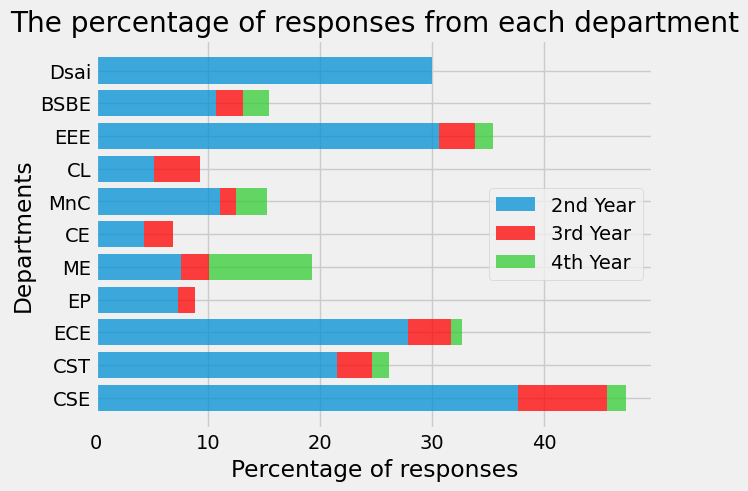

In [24]:
left = []
for i in range(len(percentage_2yr)):
    left.append(percentage_2yr[i]+percentage_3yr[i])

plt.barh(dept, percentage_2yr, alpha=0.75, label='2nd Year')
plt.barh(dept, percentage_3yr, alpha=0.75, color='red', left=percentage_2yr, label='3rd Year')
plt.barh(dept, percentage_4yr, alpha=0.75, color='#32cd32', left=left, label='4th Year')
plt.xlabel('Percentage of responses')
plt.ylabel('Departments')
plt.title('The percentage of responses from each department')
plt.legend()
plt.show()

#### Analysis
1. The maximum amount of responses were received from the CSE department. Almost 50% of them participated in the survey
2. The minimum amount of responses were received from the Civil department followed closely by the EP department
3. Most of the 2nd yearites participated in the survey, followed by 3rd yearites. 4th yearites were the least active in the survey
4. There were zero responses from the 4th yearites from the DSAi, CL, CE and EP departments
5. DSAI was the only department to have zero responses from in the 3rd year

#### Inference
1. CSE students seem to be the most active in such surveys
2. 2nd year students show the most vigour in participating in such surveys
3. The DSAI department, being the smallest department had responses only from its 2nd year